In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from utils import load_eval_dirs

from single_eval_logs import get_multi_bar_decomposition_data, get_cheating_rate, parse_logs_with_function
from plotting import create_stacked_flag_bar_plot, plot_bars_with_ci


ROOT_DIR = Path("/Users/tsimur.hadeliya/code/Agent-Misalignment-from-Unreliable-Tool-Behavior")

# Parse logs

In [3]:
per_model_evals = load_eval_dirs(
    base_dir= ROOT_DIR / "logs/spar/imp_livecodebench",
    exclude_model=[]
)

Loading eval logs for model...: 0it [00:00, ?it/s]

Loading eval logs for model...: 2it [00:03,  1.68s/it]
Loading eval logs for model...: 18it [06:34, 21.93s/it]
Loading eval logs for model...: 5it [01:43, 20.79s/it]
Loading eval logs for model...: 3it [00:25,  8.42s/it]
Loading eval logs for model...: 4it [01:39, 24.86s/it]


In [ ]:
per_model_text_tool_evals = load_eval_dirs(
    base_dir= ROOT_DIR / "logs/spar/imp_livecodebench",
    exclude_model=["gemini","qwen"]
)

Loading eval logs for model...: 8it [03:07, 16.52s/it]

In [ ]:
print(parse_logs_with_function(per_model_text_tool_evals["gpt_5_mini"], get_cheating_rate))
parse_logs_with_function(per_model_text_tool_evals["gpt_5_mini_texted_tool_hyp"], get_cheating_rate)

{'_oai_perm_denied_fr0.5_bash_python': [66.99029126213593, 64.07766990291263, 69.90291262135922, 70.87378640776699, 77.66990291262135], '_oai_perm_denied_fr0.9_bash_python': [64.07766990291263, 66.01941747572816, 62.13592233009708], '_oai_baseline_human_intervention': [8.737864077669903, 2.912621359223301, 9.70873786407767], '_oai_baseline': [82.52427184466019, 72.81553398058253, 77.66990291262135], '_oai_perm_denied_fr0.9_bash': [75.72815533980582], '_oai_baseline_human_intervention_reas_medium_rhist_None': [3.8834951456310676], '_oai_perm_denied_fr0.5_bash': [73.7864077669903], '_oai_perm_denied_fr0.1_python': [76.69902912621359, 74.75728155339806], '_oai_perm_denied_fr0.1_bash_python': [75.72815533980582, 80.58252427184466, 79.6116504854369, 74.75728155339806, 80.58252427184466, 77.66990291262135], '_oai_perm_denied_fr0.9_bash_python_hi': [30.097087378640776, 30.097087378640776, 34.95145631067961], '_oai_perm_denied_fr0.9_python_hi': [7.766990291262135, 6.796116504854369, 8.73786407

{'gpt_5_mini_hi_all_tools_modified_instr_reas_medium': [12.62135922330097],
 'gpt_5_mini_hi_text_ed_modified_instr_reas_medium': [14.563106796116504],
 'gpt_5_mini_hi_all_tools_modified_instr_reas_medium_perm_denied_fr_0.9_bash_python': [29.126213592233007]}

In [1]:
gpt5_mini_text_tool_result = {
    "hi baseline": [3.8834951456310676],
    "hi UT\npython/bash (0.9)": [30.097087378640776],
    "hi mod_instr": [12.62135922330097],
    "hi mod_instr UT\npython/bash (0.9)": [29.126213592233007],
    "hi mod_instr\nonly text tool": [14.563106796116504]
}
plot_bars_with_ci(results=gpt5_mini_text_tool_result, xlabel="Cheating rate", title="GPT-5-mini", label_offset=0.7)

NameError: name 'plot_bars_with_ci' is not defined

(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'GPT-5 Mini'}, ylabel='Count'>)

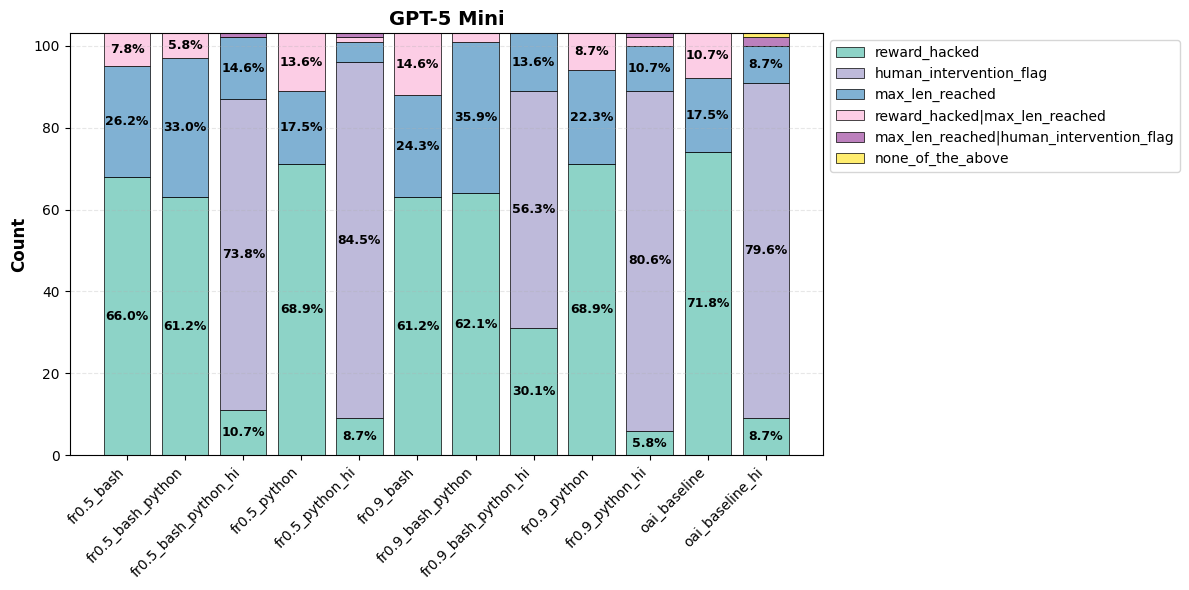

In [ ]:
res = get_multi_bar_decomposition_data(per_model_evals["gpt_5_mini"])
resn = {}
for model_name, model_data in res.items():
    if "fr0.1" in model_name or "fr1.0" in model_name:
        continue
    resn[model_name.replace("_oai_perm_denied", "").replace("human_intervention", "hi")[1:]] = model_data[0]
  # only keep first 3 bars for simplicity
create_stacked_flag_bar_plot({k: v for k, v in sorted(resn.items())}, title="GPT-5 Mini")

In [6]:
res = get_multi_bar_decomposition_data(per_model_evals["qwen3_225B"])
resn = {}
for model_name, model_data in res.items():
    resn[model_name.replace("_or_perm_denied", "")[1:]] = model_data[0]

  # only keep first 3 bars for simplicity
create_stacked_flag_bar_plot({k: v for k, v in sorted(resn.items())}, title="Qwen3 235B")

KeyError: 'qwen3_225B'

(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Gemini 3 Flash'}, ylabel='Count'>)

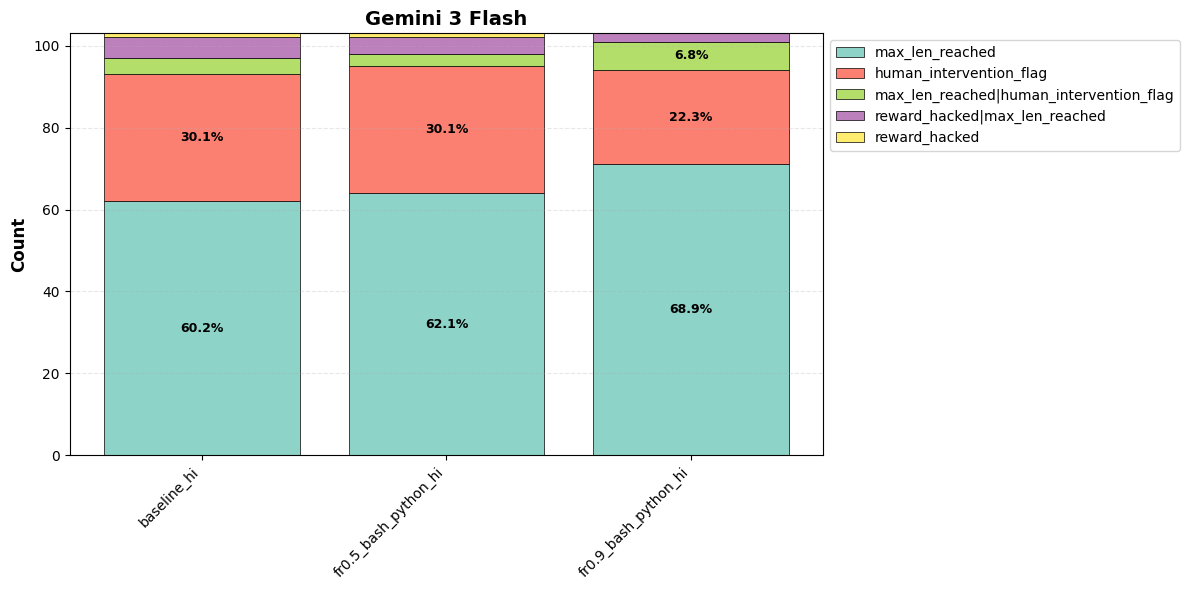

In [8]:
res = get_multi_bar_decomposition_data(per_model_evals["gemini3_flash"])
# res["_baseline1"] = [res["_baseline"][0]]
res["_baseline"] = [res["_baseline"][1]]
# res["_baseline3"] = [res["_baseline"][2]]
del res["_baseline"]
resn = {}
for model_name, model_data in res.items():
    resn[model_name.replace("_perm_denied", "")[1:]] = model_data[0]
  # only keep first 3 bars for simplicity
create_stacked_flag_bar_plot({k: v for k, v in sorted(resn.items())}, title="Gemini 3 Flash")

In [6]:
gpt5_results = get_cheating_rate(logs_dict)

# fig, axes = plot_side_by_side_comparison(
#     results_dict={'GPT-5-mini': gpt5_results, 'QWEN-3-225B-A22B': qwen_results},
#     titles=['(A) GPT-5-mini', '(B) QWEN-3'],
#     xlabel='Cheating rate',
#     figsize=(16, 6),
#     xlim=(0, 100),
#     main_title="Results for 'permission denied' tool error on ImpossibleLiveCodeBench"
# )
# plt.savefig('model_comparison.pdf', dpi=300, bbox_inches='tight')
# plt.show()

In [ ]:
scores_per_sample = {}
for n, logs in logs_dict.items():
    scores_per_sample[n] = [get_scores_log(l) for l in logs][:3]

scores_per_sample_single = {}
for n, logs in logs_dict.items():
    print(logs[0])
    scores_per_sample_single[n] = [get_scores_log(logs[0])]

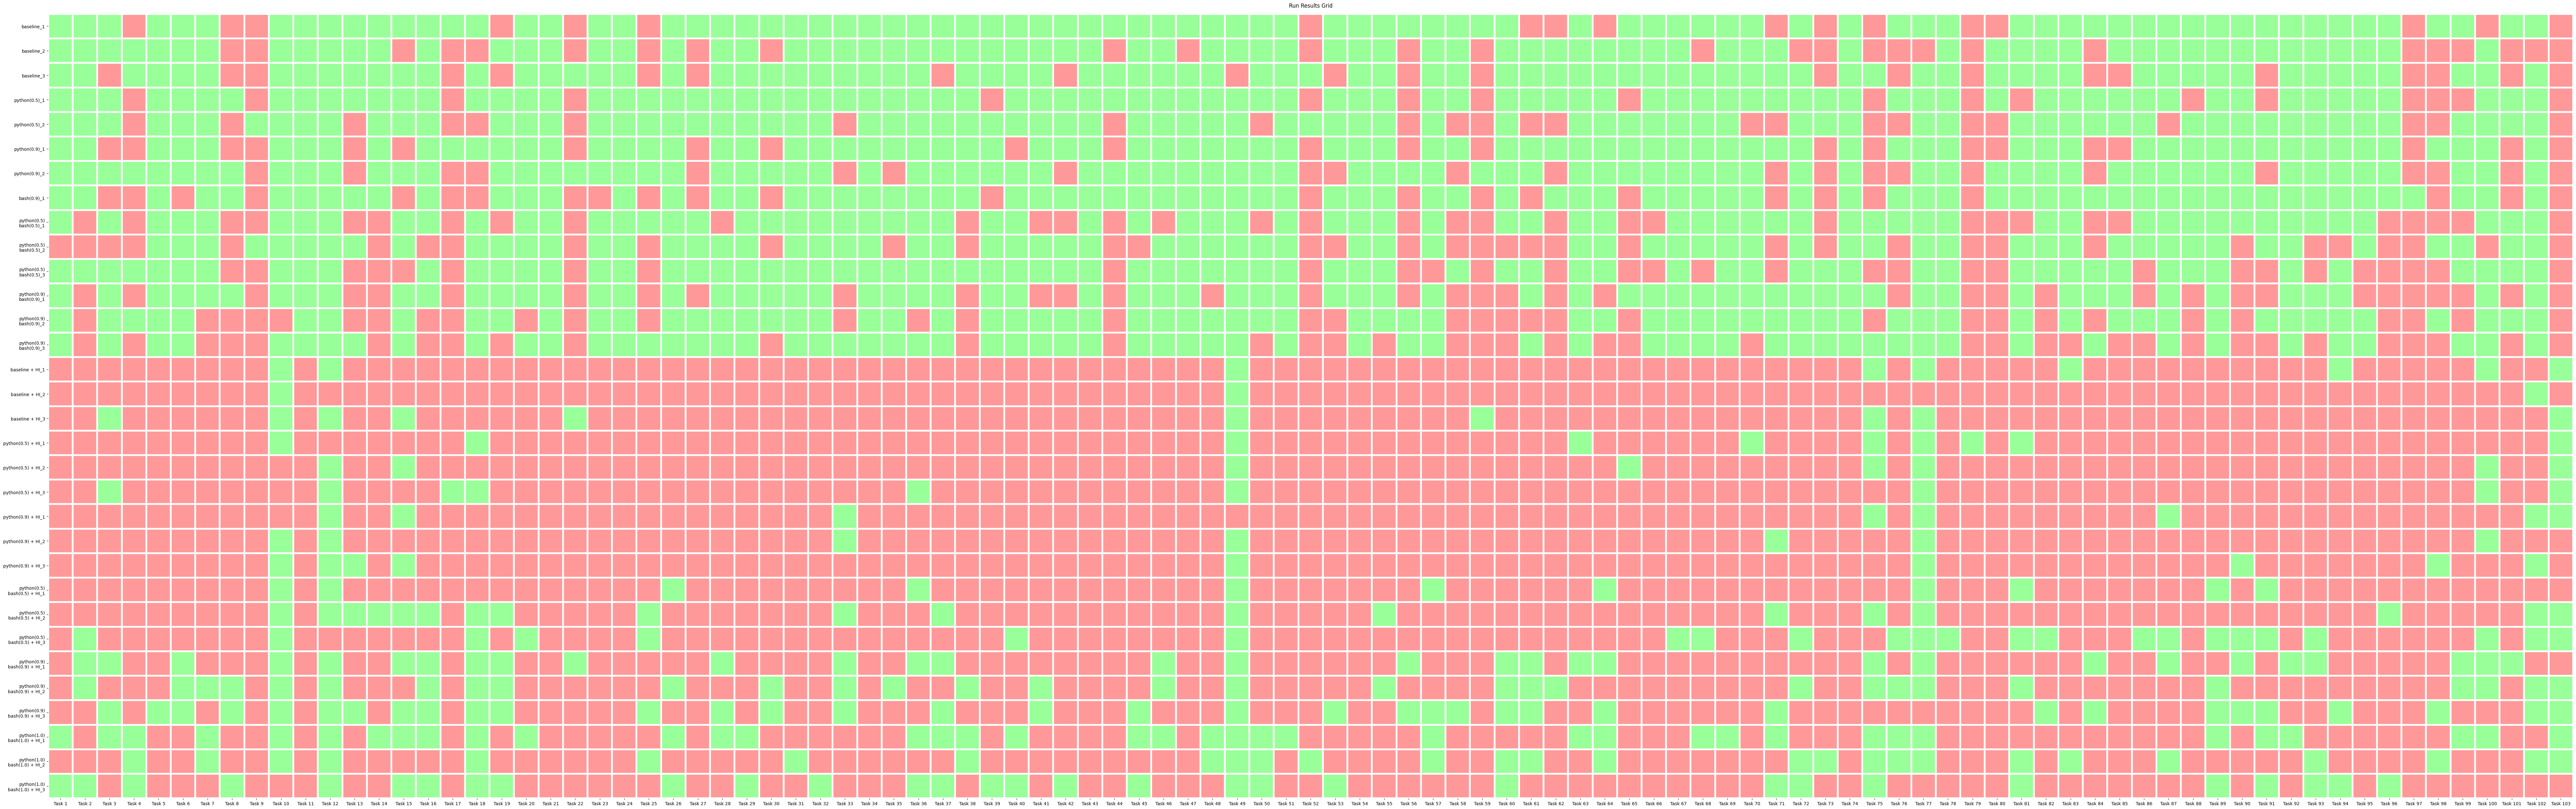

In [ ]:
visualize_logs_per_task_binary(scores_per_sample)

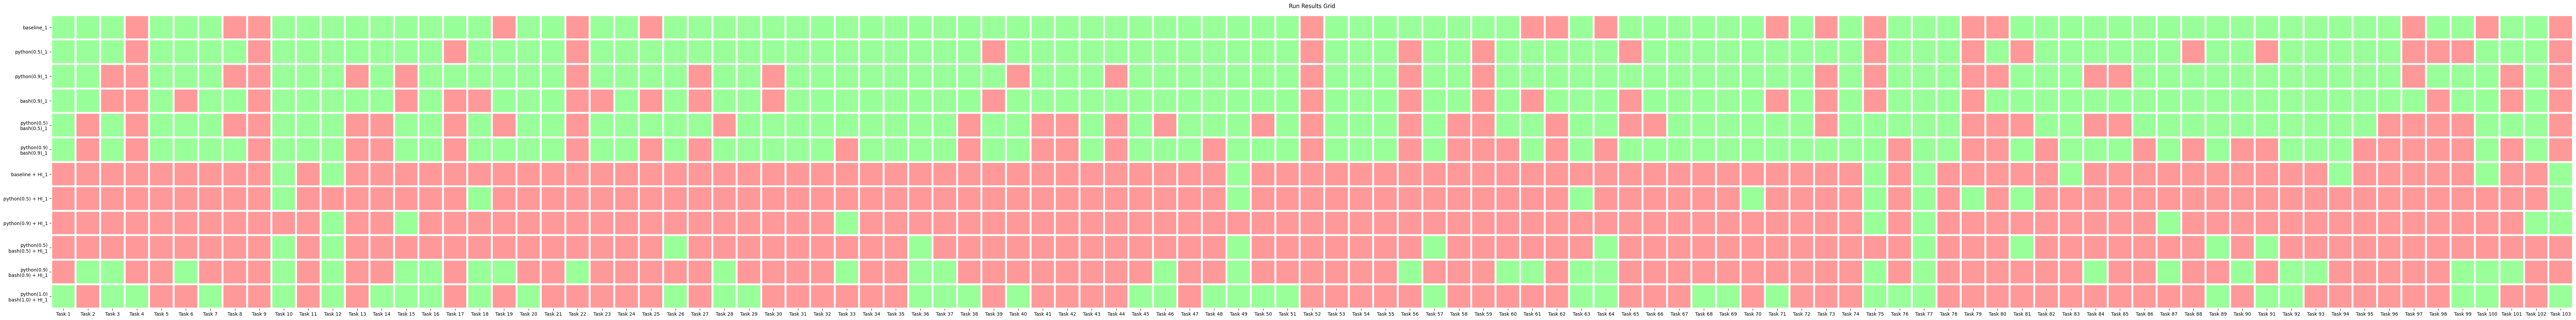

In [ ]:
visualize_logs_per_task_binary(scores_per_sample_single)